In [1]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-6.3.0-posix-seh-rt_v5-rev1\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [3]:
% pylab inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


C:\Users\Ambar Gupta\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Ambar Gupta\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [4]:
from sklearn.model_selection import RandomizedSearchCV

In [5]:
train = pd.read_csv('train.csv')

In [6]:
train.head()

,User_ID,Article_ID,Rating,ID
0,20080828074,1219102233,0,20080828074_1219102233
1,20080851125,1219110304,6,20080851125_1219110304
2,20080820760,1219151095,0,20080820760_1219151095
3,20080824760,1219295837,5,20080824760_1219295837
4,20080883177,1219209257,4,20080883177_1219209257


In [7]:
user = pd.read_csv('user.csv')
user.head()

,User_ID,Var1,Age
0,20080820123,A,NaN
1,20080820124,A,20-30
2,20080820125,A,30-40
3,20080820126,A,Less tha 15
4,20080820127,A,NaN


In [8]:
article = pd.read_csv('article.csv')
article.head()

,Article_ID,VintageMonths,NumberOfArticlesBySameAuthor,NumberOfArticlesinSameCategory
0,1219098423,10.0,3,503
1,1219098424,9.0,3,503
2,1219098425,10.0,46,503
3,1219098426,9.0,46,503
4,1219098427,9.0,38,503


In [9]:
test = pd.read_csv('test.csv')
test.head()

,User_ID,Article_ID,ID
0,20080822161,1219173561,20080822161_1219173561
1,20080839116,1219217951,20080839116_1219217951
2,20080831336,1219224091,20080831336_1219224091
3,20080820936,1219186943,20080820936_1219186943
4,20080823287,1219165896,20080823287_1219165896


In [10]:
df = pd.DataFrame()

In [11]:
df = pd.merge(train,user,on=['User_ID'])

In [12]:
df = pd.merge(df,article,on=['Article_ID'])

In [13]:
df.head()

,User_ID,Article_ID,Rating,ID,Var1,Age,VintageMonths,NumberOfArticlesBySameAuthor,NumberOfArticlesinSameCategory
0,20080828074,1219102233,0,20080828074_1219102233,A,30-40,25.0,88,289
1,20080821255,1219102233,0,20080821255_1219102233,A,60-70,25.0,88,289
2,20080826273,1219102233,3,20080826273_1219102233,B,50-60,25.0,88,289
3,20080820707,1219102233,0,20080820707_1219102233,A,50-60,25.0,88,289
4,20080820783,1219102233,4,20080820783_1219102233,B,30-40,25.0,88,289


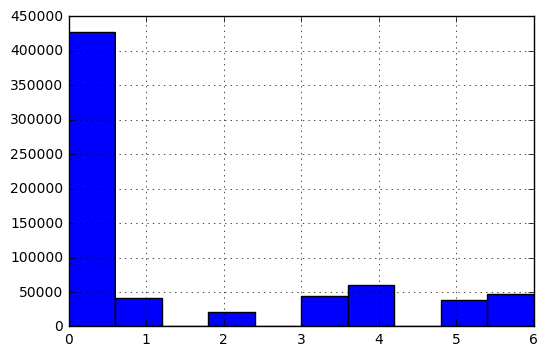

In [14]:
df['Rating'].hist()

In [15]:
df['Rating'].isnull().sum()

0

In [16]:
df.columns

Index(['User_ID', 'Article_ID', 'Rating', 'ID', 'Var1', 'Age', 'VintageMonths',
       'NumberOfArticlesBySameAuthor\r', 'NumberOfArticlesinSameCategory\r'],
      dtype='object')

In [17]:
df = df.rename(columns={'NumberOfArticlesBySameAuthor\r':'NumberOfArticlesBySameAuthor','NumberOfArticlesinSameCategory\r':'NumberOfArticlesinSameCategory'})

In [18]:
df.columns

Index(['User_ID', 'Article_ID', 'Rating', 'ID', 'Var1', 'Age', 'VintageMonths',
       'NumberOfArticlesBySameAuthor', 'NumberOfArticlesinSameCategory'],
      dtype='object')

In [19]:
df['Var1'].value_counts()

A        493652
B         61024
D         22829
C         19211
F         12439
E         10470
Other      7998
I          7412
L          4772
J          3762
K          3468
R          3446
M          2953
G          2385
N          1926
Q           820
V           770
P           647
S           585
O           527
U           434
T           262
W           178
Name: Var1, dtype: int64

In [20]:
df['Age'].value_counts()

30-40           168444
20-30           129397
40-50           101504
50-60            60104
15-20            17498
60-70            16517
Less tha 15       6943
More than 70      4897
Name: Age, dtype: int64

In [21]:
df['Var1'] = df['Var1'].fillna('A')

In [22]:
df['Var1'].isnull().sum()

0

In [23]:
df['Var1'] = df['Var1'].apply(lambda x:ord(x[0]))

In [24]:
df['Var1'] = df['Var1']-65

In [25]:
df['Var1'].value_counts()

0     510733
1      61024
3      22829
2      19211
5      12439
4      10470
14      8525
8       7412
11      4772
9       3762
10      3468
17      3446
12      2953
6       2385
13      1926
16       820
21       770
15       647
18       585
20       434
19       262
22       178
Name: Var1, dtype: int64

In [26]:
df['Age'].isnull().sum()

173747

In [27]:
tem = df[df['Age'].isnull()==False]

In [28]:
df = tem

In [29]:
len(df)

505304

In [30]:
df['Age'].value_counts()

30-40           168444
20-30           129397
40-50           101504
50-60            60104
15-20            17498
60-70            16517
Less tha 15       6943
More than 70      4897
Name: Age, dtype: int64

In [31]:
def label(x):
    if(x=='less tha 15'):
        return 0
    if(x=='15-20'):
        return 1
    if(x=='20-30'):
        return 2
    if(x=='30-40'):
        return 3
    if(x=='40-50'):
        return 4
    if(x=='50-60'):
        return 5
    if(x=='60-70'):
        return 6
    if(x=='More than 70'):
        return 7
    else:
        return 8

In [32]:
df['Age'] = df['Age'].apply(lambda x: label(x))

In [33]:
df['Age'].isnull().sum()

0

In [34]:
df['VintageMonths'] = df['VintageMonths'].fillna(17)

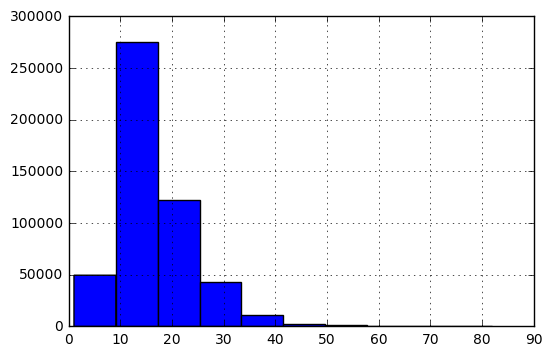

In [35]:
df['VintageMonths'].hist()

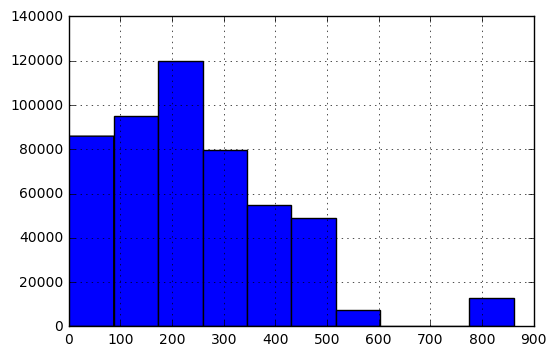

In [36]:
df['NumberOfArticlesinSameCategory'].hist()

In [37]:
df = df[df['NumberOfArticlesinSameCategory']<=600]

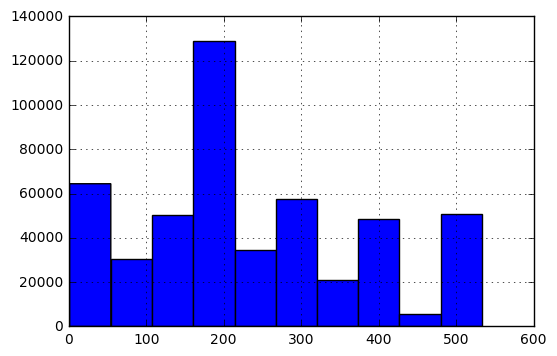

In [38]:
df['NumberOfArticlesinSameCategory'].hist()

In [159]:
df['auth_cat'] = df['NumberOfArticlesBySameAuthor']*df['NumberOfArticlesinSameCategory']

C:\Users\Ambar Gupta\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


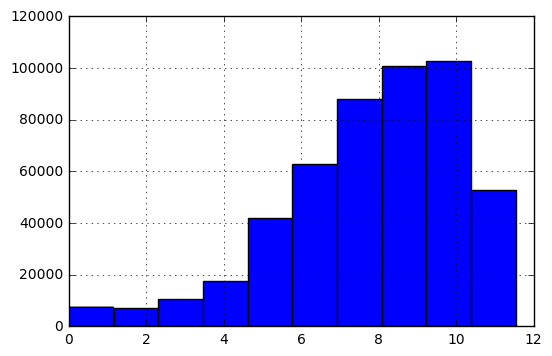

In [164]:
np.log(df['auth_cat']).hist()

In [165]:
df['auth_cat'] = np.log(df['auth_cat'])

C:\Users\Ambar Gupta\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


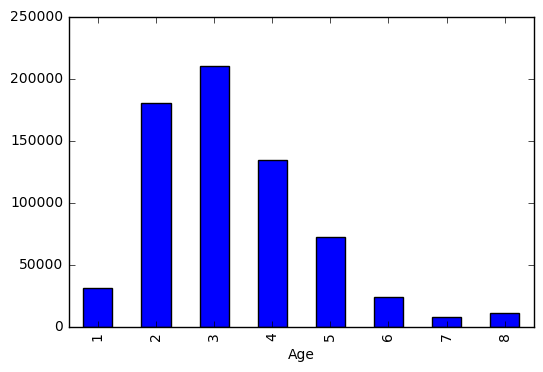

In [223]:
df.groupby('Age')['Rating'].sum().plot.bar()

In [42]:
df['Rating'].value_counts()

0    315122
4     42589
6     35117
3     30927
5     28369
1     25690
2     14467
Name: Rating, dtype: int64

In [237]:
features = ['Var1','Age']

In [238]:
X = df[features]

In [239]:
y = df['Rating']

In [46]:
df2 = pd.merge(test,user,on=['User_ID'])

In [47]:
test = pd.merge(df2,article,on=['Article_ID'])

In [48]:
test.head()

,User_ID,Article_ID,ID,Var1,Age,VintageMonths,NumberOfArticlesBySameAuthor,NumberOfArticlesinSameCategory
0,20080822161,1219173561,20080822161_1219173561,A,60-70,15.0,37,355
1,20080822111,1219173561,20080897249_1219261365,B,20-30,15.0,37,355
2,20080858645,1219173561,20080820904_1219173612,A,NaN,15.0,37,355
3,20080822161,1219327647,20080822161_1219327647,A,60-70,18.0,2,78
4,20080820207,1219327647,20080829000_1219098750,A,NaN,18.0,2,78


In [49]:
test['Var1'] = test['Var1'].fillna('A')

In [50]:
test['Var1'].isnull().sum()

0

In [51]:
test['Var1'] = test['Var1'].apply(lambda x:ord(x[0]))

In [52]:
test['Var1'] = test['Var1'] - 65

In [53]:
test['VintageMonths'].mean()

16.75904818826523

In [54]:
test['VintageMonths'] = test['VintageMonths'].fillna(17)

In [55]:
test['VintageMonths'].isnull().sum()

0

In [56]:
test = test.rename(columns={'NumberOfArticlesBySameAuthor\r':'NumberOfArticlesBySameAuthor','NumberOfArticlesinSameCategory\r':'NumberOfArticlesinSameCategory'})

In [57]:
test['NumberOfArticlesinSameCategory'].isnull().sum()

0

In [58]:
test['Age'] = test['Age'].fillna('30-40')

In [59]:
test['Age'].isnull().sum()

0

In [60]:
test['Age'] = test['Age'].apply(lambda x:label(x))

In [61]:
test['Age'].isnull().sum()

0

In [172]:
test['auth_cat'] = np.log(test['NumberOfArticlesBySameAuthor']*test['NumberOfArticlesinSameCategory'])

In [62]:
lin = LinearRegression()

In [63]:
lin.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [240]:
X_test = test[features]

In [65]:
pred1 = lin.predict(X_test)

In [87]:
pred = xgb.predict(X_test)

In [89]:
pred = pred.astype(int)

In [90]:
pred

array([1, 1, 1, ..., 1, 1, 1])

In [68]:
pred1 = pred1.astype(int)

In [75]:
knn = KNeighborsRegressor(n_neighbors=5,weights='distance',metric='l1')

In [76]:
knn.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='l1',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='distance')

In [77]:
pred3 = knn.predict(X_test) 

In [78]:
pred3 = (pred3).astype(int)

In [186]:
4 in pred

False

# starting tuning parameter

In [125]:
len(X)

492281

In [130]:
X_new = df.sample(frac=0.04)

In [131]:
len(X_new)

19691

In [133]:
X_new = X_new[features]

In [132]:
y_new = X_new['Rating']

In [134]:
X_new.head()

,Var1,Age,VintageMonths,NumberOfArticlesBySameAuthor,NumberOfArticlesinSameCategory
589461,0,5,27.0,29,399
362953,0,3,18.0,20,185
422114,0,4,23.0,1,516
169569,0,2,21.0,175,185
88397,0,1,8.0,24,172


In [135]:
# parameter testing first
param_test1 = {
 'max_depth':[3,5,7,9],
 'min_child_weight':[1,3,5]
}
gsearch1 = RandomizedSearchCV(estimator = XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_distributions = param_test1,n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_new,y_new)
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 3, 'min_child_weight': 1}, -0.0046020516436517502)

In [136]:
param_test2 = {
 'max_depth':[2,3,4]
}
gsearch2 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=3,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test2,n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_new,y_new)
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 2}, 0.007303612324421782)

In [137]:
param_test3 = {
 'gamma':[i/100.0 for i in range(0,9)]
}
gsearch3 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=2,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test3,n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_new,y_new)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.00730, std: 0.00520, params: {'gamma': 0.0},
  mean: 0.00729, std: 0.00520, params: {'gamma': 0.01},
  mean: 0.00729, std: 0.00520, params: {'gamma': 0.02},
  mean: 0.00729, std: 0.00520, params: {'gamma': 0.03},
  mean: 0.00729, std: 0.00520, params: {'gamma': 0.04},
  mean: 0.00729, std: 0.00520, params: {'gamma': 0.05},
  mean: 0.00721, std: 0.00532, params: {'gamma': 0.06},
  mean: 0.00727, std: 0.00536, params: {'gamma': 0.07},
  mean: 0.00727, std: 0.00536, params: {'gamma': 0.08}],
 {'gamma': 0.0},
 0.007303612324421782)

In [145]:
param_test4 = {
    'n_estimators':[100,200,300,400,500,600,700,800,900,1000]
}
gsearch4 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=2,
 min_child_weight=1, gamma=0.0, colsample_bylevel=0.85 , colsample_bytree=0.85,reg_alpha=1.0,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test4,n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_new,y_new)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.01162, std: 0.00198, params: {'n_estimators': 100},
  mean: 0.01265, std: 0.00334, params: {'n_estimators': 200},
  mean: 0.01256, std: 0.00362, params: {'n_estimators': 300},
  mean: 0.01220, std: 0.00429, params: {'n_estimators': 400},
  mean: 0.01218, std: 0.00451, params: {'n_estimators': 500},
  mean: 0.01169, std: 0.00460, params: {'n_estimators': 600},
  mean: 0.01109, std: 0.00489, params: {'n_estimators': 700},
  mean: 0.01048, std: 0.00494, params: {'n_estimators': 800},
  mean: 0.01031, std: 0.00524, params: {'n_estimators': 900},
  mean: 0.00987, std: 0.00561, params: {'n_estimators': 1000}],
 {'n_estimators': 200},
 0.01265163273987735)

In [139]:
param_test5 = {
 'colsample_bylevel':[i/100.0 for i in range(85,105,5)],
 'colsample_bytree':[i/100.0 for i in range(85,105,5)]
}
gsearch5 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=2,
 min_child_weight=1, gamma=0.0, colsample_bylevel=1, colsample_bytree=1,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test5,n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_new,y_new)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.00935, std: 0.00548, params: {'colsample_bylevel': 0.85, 'colsample_bytree': 0.85},
  mean: 0.00935, std: 0.00548, params: {'colsample_bylevel': 0.85, 'colsample_bytree': 0.9},
  mean: 0.00935, std: 0.00548, params: {'colsample_bylevel': 0.85, 'colsample_bytree': 0.95},
  mean: 0.00884, std: 0.00594, params: {'colsample_bylevel': 0.85, 'colsample_bytree': 1.0},
  mean: 0.00935, std: 0.00548, params: {'colsample_bylevel': 0.9, 'colsample_bytree': 0.85},
  mean: 0.00935, std: 0.00548, params: {'colsample_bylevel': 0.9, 'colsample_bytree': 0.9},
  mean: 0.00935, std: 0.00548, params: {'colsample_bylevel': 0.9, 'colsample_bytree': 0.95},
  mean: 0.00884, std: 0.00594, params: {'colsample_bylevel': 0.9, 'colsample_bytree': 1.0},
  mean: 0.00935, std: 0.00548, params: {'colsample_bylevel': 0.95, 'colsample_bytree': 0.85},
  mean: 0.00935, std: 0.00548, params: {'colsample_bylevel': 0.95, 'colsample_bytree': 0.9},
  mean: 0.00935, std: 0.00548, params: {'colsample_bylevel': 0.95, 'c

In [140]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=2,
 min_child_weight=1, gamma=0.0, colsample_bylevel=0.85, colsample_bytree=0.85,reg_alpha=0,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test6,n_jobs=4,iid=False, cv=5)
gsearch6.fit(X_new,y_new)
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.00935, std: 0.00548, params: {'reg_alpha': 1e-05},
  mean: 0.00918, std: 0.00587, params: {'reg_alpha': 0.01},
  mean: 0.00898, std: 0.00573, params: {'reg_alpha': 0.1},
  mean: 0.00987, std: 0.00561, params: {'reg_alpha': 1},
  mean: 0.00953, std: 0.00089, params: {'reg_alpha': 100}],
 {'reg_alpha': 1},
 0.009874053320142972)

In [142]:
param_test7 = {
 'reg_alpha':[0.9,1.0,1.5]
}
gsearch7 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=2,
 min_child_weight=1, gamma=0.0, colsample_bylevel=0.85, colsample_bytree=0.85,reg_alpha=1,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test7,n_jobs=4,iid=False, cv=5)
gsearch7.fit(X_new,y_new)
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

([mean: 0.00912, std: 0.00509, params: {'reg_alpha': 0.9},
  mean: 0.00987, std: 0.00561, params: {'reg_alpha': 1.0},
  mean: 0.00954, std: 0.00546, params: {'reg_alpha': 1.5}],
 {'reg_alpha': 1.0},
 0.009874053320142972)

In [148]:
param_test8 = {
 'learning_rate':[0.05,0.1]
}
gsearch8 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, n_estimators=200, max_depth=2,
 min_child_weight=1, gamma=0.0, colsample_bylevel=0.85, colsample_bytree=0.85,reg_alpha=1.0,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test8,n_jobs=4,iid=False, cv=5)
gsearch8.fit(X_new,y_new)
gsearch8.grid_scores_, gsearch8.best_params_, gsearch8.best_score_

([mean: 0.01185, std: 0.00232, params: {'learning_rate': 0.05},
  mean: 0.01265, std: 0.00334, params: {'learning_rate': 0.1}],
 {'learning_rate': 0.1},
 0.01265163273987735)

In [149]:
param_test9={
    'subsample':[0.5,0.6,0.7,0.8,0.9,1.0]
}
gsearch9 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, n_estimators=200, max_depth=2,
 min_child_weight=1, gamma=0.0, colsample_bylevel=0.85, colsample_bytree=0.85,reg_alpha=1.0,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27,subsample=1), 
 param_grid = param_test9,n_jobs=4,iid=False, cv=5)
gsearch9.fit(X_new,y_new)
gsearch9.grid_scores_, gsearch9.best_params_, gsearch9.best_score_

([mean: 0.01229, std: 0.00218, params: {'subsample': 0.5},
  mean: 0.01234, std: 0.00301, params: {'subsample': 0.6},
  mean: 0.01202, std: 0.00315, params: {'subsample': 0.7},
  mean: 0.01205, std: 0.00336, params: {'subsample': 0.8},
  mean: 0.01250, std: 0.00277, params: {'subsample': 0.9},
  mean: 0.01265, std: 0.00334, params: {'subsample': 1.0}],
 {'subsample': 1.0},
 0.01265163273987735)

In [170]:
xgb = XGBRegressor(learning_rate =0.1, n_estimators=200, max_depth=2,
 min_child_weight=1, gamma=0.0, colsample_bylevel=0.85, colsample_bytree=0.85,reg_alpha=1.0,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27,subsample=1)

In [241]:
xgb1 = XGBRegressor()

In [242]:
xgb1.fit(X,y)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [174]:
X_test.columns

Index(['Var1', 'Age', 'VintageMonths', 'NumberOfArticlesBySameAuthor',
       'NumberOfArticlesinSameCategory', 'auth_cat'],
      dtype='object')

In [243]:
pred = xgb1.predict(X_test)

In [244]:
pred = (pred).astype(int)

In [203]:
3 in pred

False

In [245]:
submission = pd.DataFrame(data=[], columns=['ID', 'Rating'])
submission.ID = test.ID; submission.Rating = pred

submission.to_csv('submission.csv', index=False)

submission.head()

,ID,Rating
0,20080822161_1219173561,1
1,20080897249_1219261365,1
2,20080820904_1219173612,1
3,20080822161_1219327647,1
4,20080829000_1219098750,1
